In [1]:
from utilities.proj1_helpers import load_csv_data
import numpy as np
from utilities.pca import compute_pca
from utilities.preprocessing import standard_scaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utilities.proj1_helpers import *

In [69]:
train_data = load_csv_data("data/train.csv")
y_train, x_train, ids = train_data[0], train_data[1], train_data[2]
indices = [i for i in range(30)]
del indices[23]
y_train = y_train[indices]
x_train = x_train[:, indices]
ids = ids[indices]
y_train[np.where(y_train == -1)] = 0
N, D = x_train.shape
print(y_train.shape, x_train.shape, ids.shape)

(29,) (250000, 29) (29,)


0


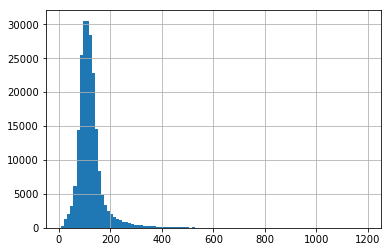

1


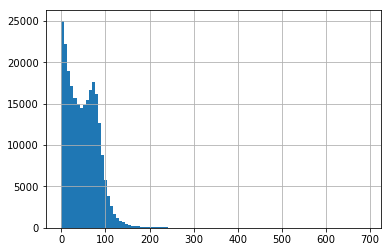

2


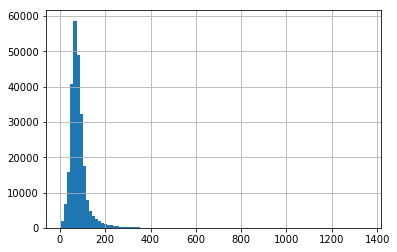

3


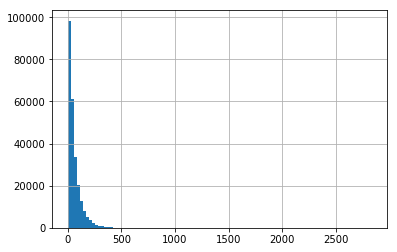

4


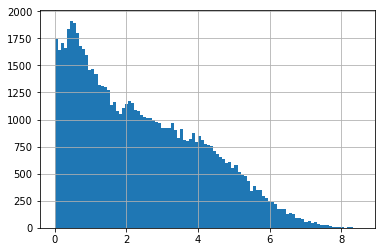

5


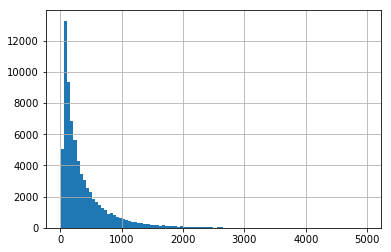

6


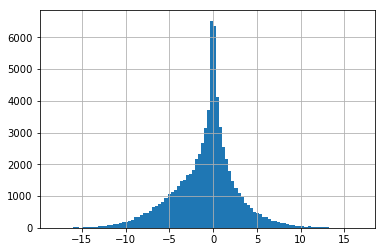

7


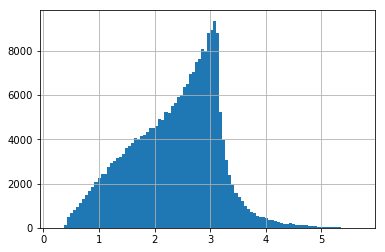

8


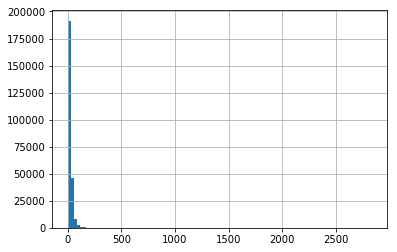

9


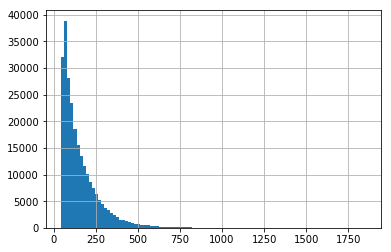

10


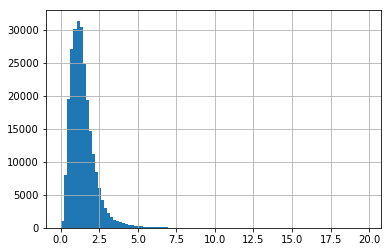

11


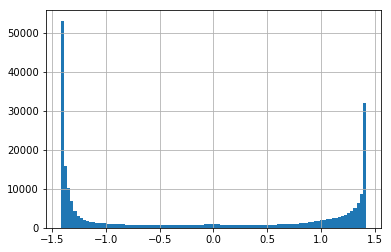

12


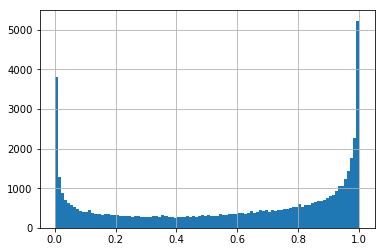

13


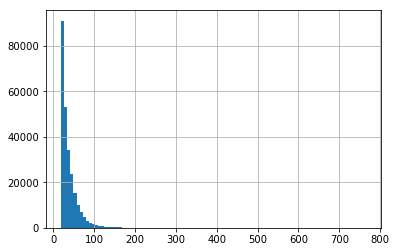

14


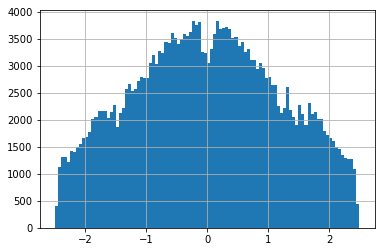

15


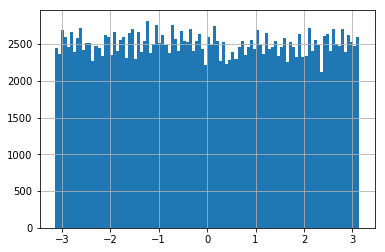

16


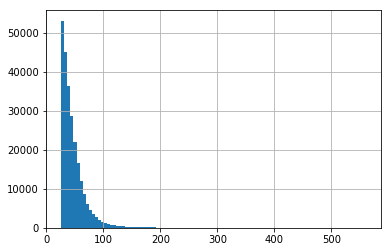

17


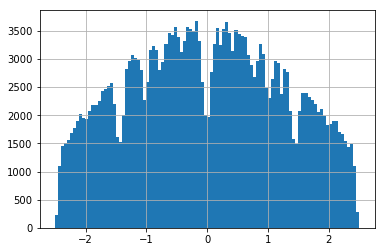

18


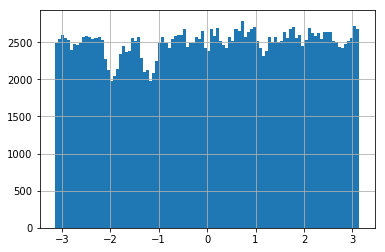

19


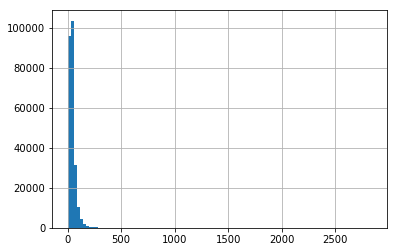

20


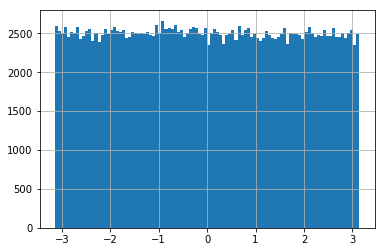

21


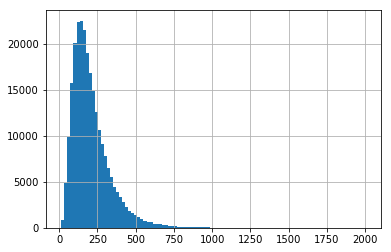

22


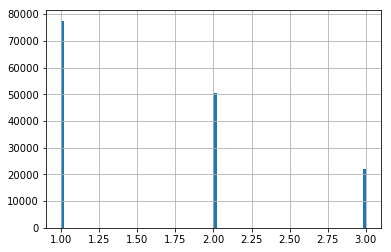

23


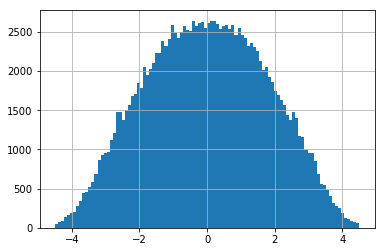

24


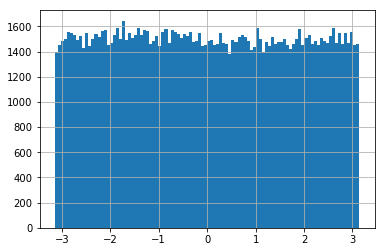

25


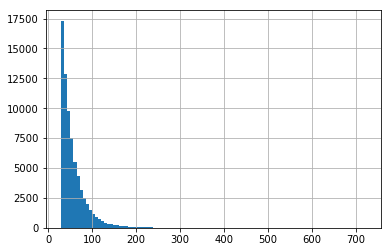

26


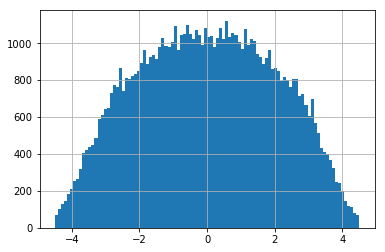

27


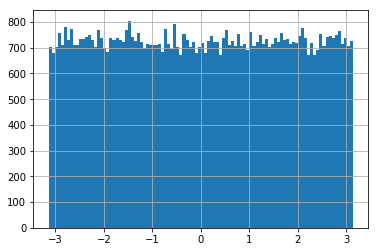

28


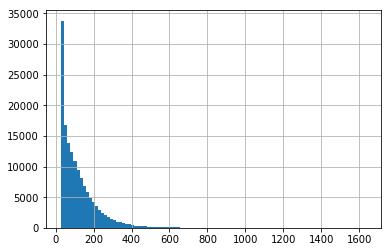

In [149]:
df = pd.DataFrame(x_train)
df = df[df != 0]
df = df.replace(-999.0, np.nan)
#df.dropna(inplace=True)
axis = [i for i in range(len(df))]
for i in df.columns.values:
    print(i)
    #sns.distplot(df[i], bins=10)
    fig, ax = plt.subplots()
    df[i].hist(bins=100)
    #ax.set_yscale('log')
    plt.show()

In [153]:
df_log = np.log(df)

C:\Users\MATT\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,4.930654,3.944587,4.583201,3.331490,-0.094311,4.825999,0.980579,1.119721,3.735954,5.287054,...,2.822806,NaN,5.555797,0.693147,0.765468,-0.811931,3.829988,0.215111,NaN,4.731776
1,5.081013,4.230739,4.637008,3.874238,NaN,NaN,NaN,1.245019,0.731406,4.829569,...,3.800063,NaN,5.103190,0.000000,-0.321584,0.146694,NaN,NaN,NaN,3.833542
2,NaN,5.088658,4.835909,3.573328,NaN,NaN,NaN,1.146767,2.233878,5.287327,...,3.994211,NaN,5.562273,0.000000,0.719302,NaN,NaN,NaN,NaN,3.789878
3,4.969153,4.399584,4.393745,-0.881889,NaN,NaN,NaN,1.196948,-0.881889,4.330312,...,3.436629,-2.813411,4.455068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.169711,2.828201,4.903829,2.797586,NaN,NaN,NaN,1.358666,2.797586,4.060150,...,1.001734,NaN,3.972761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.496961,2.606387,4.080060,4.756551,0.969263,5.651028,NaN,0.308954,4.120970,5.630767,...,3.707088,0.805136,5.644913,1.098612,NaN,NaN,4.028294,-1.496109,1.133336,5.266104
6,5.002294,3.362526,4.680111,4.664665,-0.310610,5.064865,-2.180367,1.078750,0.934131,5.723477,...,3.648604,NaN,5.683831,0.693147,-0.146183,0.371564,4.040715,-2.032558,NaN,5.192273
7,5.042883,2.343535,4.550862,3.373107,NaN,NaN,NaN,1.063676,0.422650,4.928543,...,3.103465,NaN,5.232706,0.000000,NaN,NaN,NaN,NaN,NaN,3.422241
8,4.659602,3.923141,4.615012,1.455820,NaN,NaN,NaN,1.066089,1.455820,4.179497,...,3.632071,-3.729701,4.866026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.852444,4.487973,4.238041,5.264719,NaN,NaN,NaN,0.475613,3.362422,5.541746,...,4.887925,-0.168419,5.686097,0.000000,NaN,NaN,NaN,NaN,NaN,5.122385


In [5]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    poly = np.array([x**j for j in range(degree+1)]).T
    return poly

def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    gram = (tx.T).dot(tx)
    N = len(y)
    try:
        w_star = np.linalg.inv(gram).dot(tx.T).dot(y)
    except np.linalg.LinAlgError:
        U, S, V = np.linalg.svd(tx)
        w_star = V.dot(np.linalg.pinv(S)).dot(U.T).dot(y)
    e = y-tx.dot(w_star)
    MSE = (e.T).dot(e)/(2*N)
    return MSE, w_star

def polynomial_regression(x, y):
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = range(10)
    best_params = (0, 0)
    w = 0
    loss = np.infty
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        poly = build_poly(x, degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        mse, weights = least_squares(y, poly)
        rmse = np.sqrt(2*mse)
        if rmse < loss:
            best_params = (degree, rmse)
            w = weights
            loss = rmse

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
    return best_params, w